In [44]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = read_csv('../data/AirQualityDataHourly.csv', header=4)
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')
idf = df.set_index(['Date','time'])

df2 = read_csv('../data/AirQualityData15Minutes.csv', header=4)
df2['Date'] =  pd.to_datetime(df2['Date'], format='%d-%m-%Y')
idf2 = df2.set_index(['Date','time'])

In [35]:
ozone = df['Ozone']
ozone = ozone.convert_objects(convert_numeric=True)
bins = [0,34,67,101,121,141,161,188,214,241,2000]
group_names = [1,2,3,4,5,6,7,8,9,10]
ozone.head()

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


0    33.86038
1    35.39041
2    43.10712
3    31.28260
4    13.02194
Name: Ozone, dtype: float64

In [36]:
categories = pd.cut(ozone, bins, labels=group_names)
df['categories'] = pd.cut(ozone, bins, labels=group_names)
categories.head()

0    1
1    2
2    2
3    1
4    1
Name: Ozone, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [37]:
pd.value_counts(df['categories'])

2     1621
1     1129
3      420
10       0
9        0
8        0
7        0
6        0
5        0
4        0
dtype: int64

In [38]:
df[['Ozone','categories']].head()

,Ozone,categories
0,33.86038,1
1,35.39041,2
2,43.10712,2
3,31.28260,1
4,13.02194,1


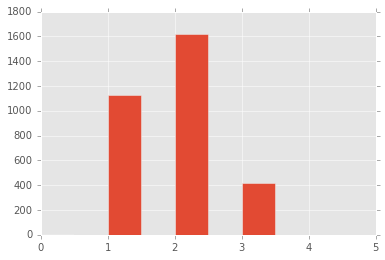

In [46]:
df['categories'].hist(range=[0, 5])

# Older testing

In [7]:
#idf2.loc['2015-12-01','00:00']['Sulphur dioxide'].append('2')
idf2.head(20)

Sulphur dioxide status/unit
Date       time                              
2015-12-01 00:15          1.04573     V ugm-3
           00:30          1.30650     V ugm-3
           00:45          1.04573     V ugm-3
           01:00              NaN            
           01:15              NaN            
           01:30          0.00000     V ugm-3
           01:45          0.52154     V ugm-3
           02:00          0.26077     V ugm-3
           02:15          0.52154     V ugm-3
           02:30          0.26077     V ugm-3
           02:45          0.52154     V ugm-3
           03:00          0.26077     V ugm-3
           03:15          0.78497     V ugm-3
           03:30          0.78497     V ugm-3
           03:45          1.04573     V ugm-3
           04:00          1.04573     V ugm-3
           04:15          1.04573     V ugm-3
           04:30          1.30650     V ugm-3
           04:45          1.30650     V ugm-3
           05:00          0.52154     V ugm-3

In [8]:
idf = idf.convert_objects(convert_numeric=True)
idf.head(1)

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,,PM10 particulate matter (Hourly measured),status/unit,Modelled Wind Direction,status/unit.1,Modelled Wind Speed,status/unit.2,Modelled Temperature,status/unit.3,Nitric oxide,status/unit.4,Nitrogen dioxide,status/unit.5,Ozone,status/unit.6,PM2.5 particulate matter (Hourly measured),status/unit.7,Sulphur dioxide,status/unit.8
Date,time,,,,,,,,,,,,,,,,,,
2015-12-01,01:00,4.0,V ugm-3 (TEOM FDMS),NaN,NaN,NaN,NaN,NaN,NaN,1.48512,V ugm-3,27.98243,V ugm-3,33.86038,V ugm-3,6.1,V ugm-3 (TEOM FDMS),1.13266,V ugm-3


In [15]:
def qualityindex(df):
    
    ozoneindex = []
    #TODO 8h keskiarvo
    for i in df['Ozone']:
        if i>=0 and i<34:
            ozoneindex.append('1')
        elif i>=34 and i<67:
            ozoneindex.append('2')
        elif i>=67 and i<101:
            ozoneindex.append('3')
        elif i>=101 and i<121:
            ozoneindex.append('4')
        elif i>=121 and i<141:
            ozoneindex.append('5')
        elif i>=141 and i<161:
            ozoneindex.append('6')
        elif i>=161 and i<188:
            ozoneindex.append('7')
        elif i>=188 and i<214:
            ozoneindex.append('8')
        elif i>=214 and i<241:
            ozoneindex.append('9')
        elif i>=241:
            ozoneindex.append('10')
        else:
            ozoneindex.append('0')
    df['Ozoneindex'] = ozoneindex

    PM25index= []
    for i in df['PM2.5 particulate matter (Hourly measured)']:
        if i>=0 and i<12:
            PM25index.append('1')
        elif i>=12 and i<24:
            PM25index.append('2')
        elif i>=24 and i<36:
            PM25index.append('3')
        elif i>=36 and i<42:
            PM25index.append('4')
        elif i>=42 and i<48:
            PM25index.append('5')
        elif i>=48 and i<54:
            PM25index.append('6')
        elif i>=54 and i<59:
            PM25index.append('7')
        elif i>=59 and i<65:
            PM25index.append('8')
        elif i>=65 and i<71:
            PM25index.append('9')
        elif i>=71:
            PM25index.append('10')
        else:
            PM25index.append('0')
        df['PM25index'] = PM25index

    PM10index = []
    for i in df['PM10 particulate matter (Hourly measured)']:
        if i>=0 and i<17:
            PM10index.append('1')
        elif i>=17 and i<34:
            PM10index.append('2')
        elif i>=34 and i<51:
            PM10index.append('3')
        elif i>=51 and i<59:
            PM10index.append('4')
        elif i>=59 and i<67:
            PM10index.append('5')
        elif i>=67 and i<76:
            PM10index.append('6')
        elif i>=76 and i<84:
            PM10index.append('7')
        elif i>=84 and i<92:
            PM10index.append('8')
        elif i>=92 and i<101:
            PM10index.append('9')
        elif i>=101:
            PM10index.append('10')
        else:
            PM10index.append('0')
        df['PM10index'] = PM10index

    return df

In [16]:
data = idf[['Ozone','Nitrogen dioxide','Sulphur dioxide','PM2.5 particulate matter (Hourly measured)','PM10 particulate matter (Hourly measured)']]
#print qualityindex(data)[['Ozone','Ozoneindex']]
data = qualityindex(data)
data = data.convert_objects(convert_numeric=True)
data

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Length of values does not match length of index